# Image processing in OpenCV
## Changing color space

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

`cv2.cvtColor(src, flag)` is used to convert color space. For example, `cv2.COLOR_BGR2HSV` convert BGR to HSV. HSV has Hue（色相）, Saturation（彩度） and Value（明度） component.

In [5]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]  # get all of color flags
# print(flags)

### Object tracking

In [10]:
cap = cv2.VideoCapture(0)

while(1):
    _, frame = cap.read()
    
    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # define range of blue color in HSV
    lower_blue = np.array([110, 50, 50])
    upper_blue = np.array([130, 255, 255])
    
    mask = cv2.inRange(frame_hsv, lower_blue, upper_blue)  # get only blue colors
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    cv2.startWindowThread()  # This line is not needed when you execute from terminal.
    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    cv2.imshow('res', res)
    
    key = cv2.waitKey(5) & 0xFF
    if key == 27:
        break

cap.release()
cv2.waitKey(1)  # This line is not needed when you execute from terminal.
cv2.destroyAllWindows()
cv2.waitKey(1)  # This line is not needed when you execute from terminal.

-1

### Find HSV values to track

In [13]:
green = np.uint8([[[0, 255, 0]]])
hsv_green = cv2.cvtColor(green, cv2.COLOR_BGR2HSV)
print(hsv_green)

[[[ 60 255 255]]]


### assignment
Try to find a way to extract more than one colored object, for example, extract red, blue, and green objects simultaneously.

In [16]:
cap = cv2.VideoCapture(0)

while(1):
    _, frame = cap.read()
    
    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # define range of color in HSV
    lower_blue = np.array([110, 100, 100])
    upper_blue = np.array([130, 255, 255])
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([20, 255, 255])
    lower_green = np.array([50, 100, 100])
    upper_green = np.array([70, 255, 255])
    
    mask_blue = cv2.inRange(frame_hsv, lower_blue, upper_blue)  # get only blue colors
    mask_red = cv2.inRange(frame_hsv, lower_red, upper_red)  # get only red colors
    mask_green= cv2.inRange(frame_hsv, lower_green, upper_green)  # get only green colors
    
    mask = cv2.bitwise_or(mask_blue, cv2.bitwise_or(mask_red, mask_green))
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    cv2.startWindowThread()  # This line is not needed when you execute from terminal.
    cv2.imshow('res', res)
    
    key = cv2.waitKey(5) & 0xFF
    if key == 27:
        break

cap.release()
cv2.waitKey(1)  # This line is not needed when you execute from terminal.
cv2.destroyAllWindows()
cv2.waitKey(1)  # This line is not needed when you execute from terminal.

-1

## Geometric transformations of images
### Scaling

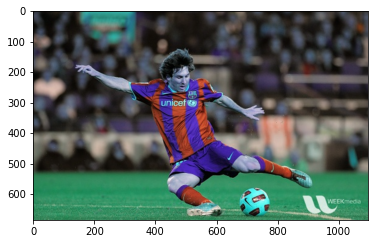

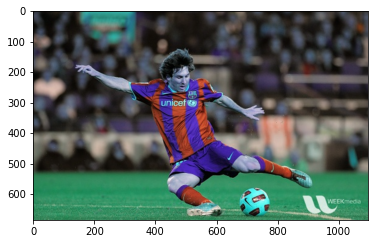

In [19]:
img = cv2.imread('inputs/messi5.jpg')
res = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

plt.imshow(res)
plt.show()

# same process
height, width = img.shape[:2]
res = cv2.resize(img, (2*width, 2*height), interpolation=cv2.INTER_CUBIC)

plt.imshow(res)
plt.show()

`cv2.resize(src, dsize, fx, fy, interpolation)` can set either size or magnification.  
If you set the `dsize`, you don't set `fx` and `fy`. If you set fx and fy, `dsize` should be `None`.  
`interpolation` has some flags and `cv2.INTER_AREA` is used when shrinking. `cv2.INTER_LINEAR` and `cv2.INTER_CUBIC` is used when expanding, `cv2.INTER_CUBIC` is more precise and more complex than `cv2.INTER_LINEAR`.

### Translation

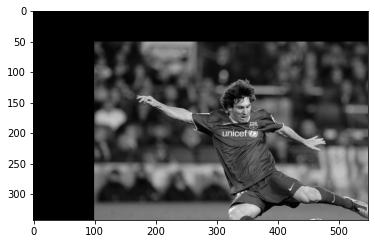

In [22]:
img = cv2.imread('inputs/messi5.jpg', 0)
rows, cols = img.shape

matrix = np.float32([[1, 0, 100], [0, 1, 50]])  # translate +100 along x, +50 along y
dst = cv2.warpAffine(img, matrix, (cols, rows))

plt.imshow(dst, cmap="gray")
plt.show()

`cv2.warpAffine(src, matrix, size)` do affine transformation. size is expressed as (width, height).

### Rotation

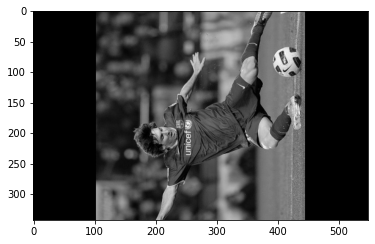

In [24]:
img = cv2.imread('inputs/messi5.jpg', 0)
rows, cols = img.shape

matrix = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1)
dst = cv2.warpAffine(img, matrix, (cols, rows))

plt.imshow(dst, "gray")
plt.show()

Affine matrix can be obtained by `cv2.getRotationMatrix2D(center, rotation, scaling)`.

### Affine transformation

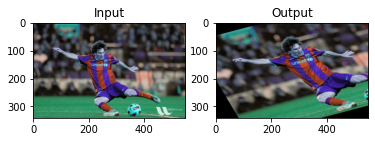

In [28]:
img = cv2.imread('inputs/messi5.jpg')
rows, cols, channels = img.shape

pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

matrix = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, matrix, (cols, rows))

plt.subplot(121), plt.imshow(img), plt.title('Input')
plt.subplot(122), plt.imshow(dst), plt.title('Output')
plt.show()

`cb2.getAffineTransform` returns affine matrix from three pairs of points.

### Perspective transformation

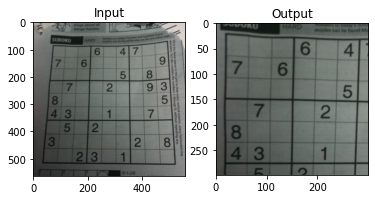

In [31]:
img = cv2.imread('inputs/sudoku.png')
rows, cols, channels = img.shape

pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])

matrix = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(img, matrix, (300, 300))

plt.subplot(121), plt.imshow(img), plt.title('Input')
plt.subplot(122), plt.imshow(dst), plt.title('Output')
plt.show()

Perspective transformation keep its linearity. `cv2.getPerspectiveTransform` returns 3x3 transformation matrix from four pairs of points.

## Image thresholding
### Simple thresholding

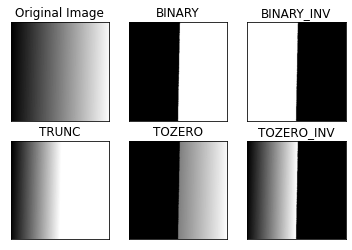

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('inputs/gradient.png', 0)

ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)  # maxval if src(x, y) > thresh else 0
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)  # 0 if src(x, y) > thresh else maxval
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)  # maxval if src(x, y) > thresh else src(x, y)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)  # src(x, y) if src(x, y) > thresh else 0
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)  # 0 if src(x, y) > thresh else src(x, y)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()


### Adaptive thresholding

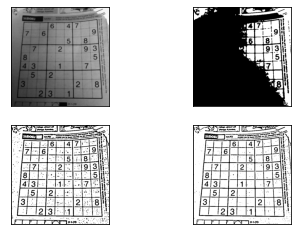

In [33]:
import cv2

img = cv2.imread('inputs/sudoku.png', 0)
img = cv2.medianBlur(img, 5)

ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.xticks([])
    plt.yticks([])

plt.show()


Adaptive thresholding process calculates the threshold value in each small region and is effecive when illumination environment varies.  
Third argument is the adaptive method to calculate threshold and fifth argument is the size of neighbor region to calculate threshold.

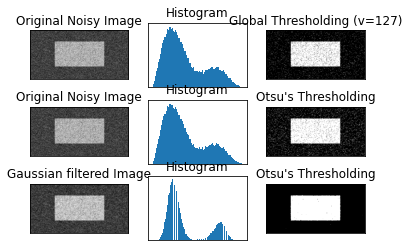

In [34]:
img = cv2.imread('inputs/noisy2.png', 0)

ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

blur = cv2.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ["Original Noisy Image", "Histogram", "Global Thresholding (v=127)",
               "Original Noisy Image", "Histogram", "Otsu's Thresholding",
               "Gaussian filtered Image", "Histogram", "Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3, 3, i*3+1)
    plt.imshow(images[i*3], 'gray')
    plt.title(titles[i*3])
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(3, 3, i*3+2)
    plt.hist(images[i*3].ravel(), 256)
    plt.title(titles[i*3+1])
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(3, 3, i*3+3)
    plt.imshow(images[i*3+2], 'gray')
    plt.title(titles[i*3+2])
    plt.xticks([]), plt.yticks([])

plt.show()

When assigning `cv2.THRESH_OTSU` as fourth argument of `cv2.threshold` and `0` as second argument, the threshold is calculated by the function and returns as first value. 

### The algorithm of Otsu's binarizaton
Otsu's algorithm find the threshold t which minimizes the weighted within-class variance.

In [44]:
img = cv2.imread('inputs/noisy2.png', 0)
blur = cv2.GaussianBlur(img, (5, 5), 0)

hist = cv2.calcHist([blur], [0], None, [256], [0, 256])
hist_norm = hist.ravel() / hist.max()
Q = hist_norm.cumsum()  # cumulative sum

bins = np.arange(256)

fn_min = np.inf
thresh = -1

for i in range(1, 255):
    p1, p2 = np.hsplit(hist_norm, [i])
    q1, q2 = Q[i], Q[255] - Q[i]
    b1, b2 = np.hsplit(bins, [i])
    
    m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2
    v1, v2 = np.sum(((b1 - m1) ** 2) * p1) / q1, np.sum(((b2 - m2) ** 2) * p2) / q2
    
    fn = v1 * q1 + v2 * q2
    if fn < fn_min:
        fn_min = fn
        thresh = i

ret, otsu = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(thresh, ret)

118 117.0


/var/folders/ky/0qtmzqrs3cb5ksc2w2w798kh0000gn/T/ipykernel_3658/1669373989.py:18: RuntimeWarning: invalid value encountered in double_scalars
  m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2
/var/folders/ky/0qtmzqrs3cb5ksc2w2w798kh0000gn/T/ipykernel_3658/1669373989.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2
/var/folders/ky/0qtmzqrs3cb5ksc2w2w798kh0000gn/T/ipykernel_3658/1669373989.py:19: RuntimeWarning: invalid value encountered in multiply
  v1, v2 = np.sum(((b1 - m1) ** 2) * p1) / q1, np.sum(((b2 - m2) ** 2) * p2) / q2


## Smoothing images
### 2d Convolution

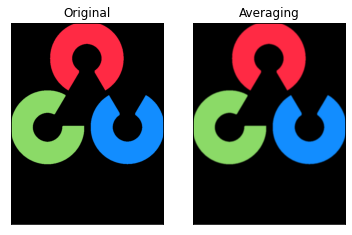

In [47]:
img = cv2.imread('inputs/opencv-logo.png')

kernel = np.ones((5, 5), np.float32) / 25
dst = cv2.filter2D(img, -1, kernel)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(dst)
plt.title('Averaging')
plt.xticks([]), plt.yticks([])

plt.show()

### Image blurring
#### 1. Averaging

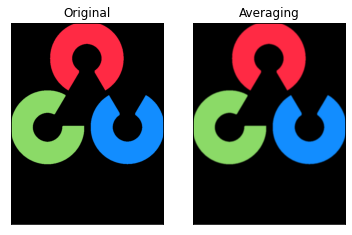

In [50]:
img = cv2.imread('inputs/opencv-logo.png')
blur = cv2.blur(img, (5, 5))

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blur = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(blur)
plt.title('Blurred')
plt.xticks([]), plt.yticks([])

plt.show()

#### 2. Gaussian filter

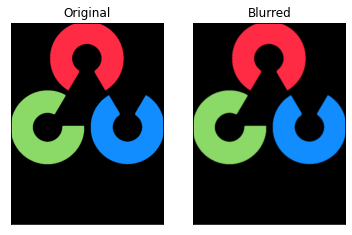

In [52]:
img = cv2.imread('inputs/opencv-logo.png')
blur = cv2.GaussianBlur(img, (5, 5), 0)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blur = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(blur)
plt.title('Blurred')
plt.xticks([]), plt.yticks([])

plt.show()

#### Median filter
This filter is effective against salt-and-pepper noise in an image.

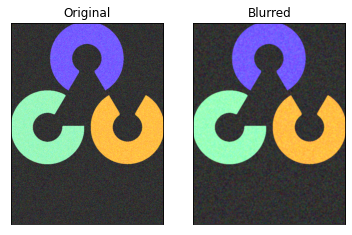

True

In [86]:
img = cv2.imread('inputs/opencv-logo.png')
noise = np.random.randint(0, 100, img.shape).astype(np.uint8)
img = cv2.add(img, noise)
blur = cv2.medianBlur(img, 5)

plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(blur)
plt.title('Blurred')
plt.xticks([]), plt.yticks([])

plt.show()

#### Bilateral filter
This filter keep the edge and blur an image.

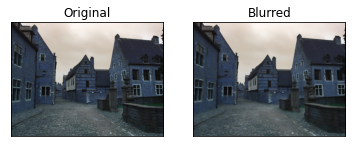

True

In [88]:
img = cv2.imread('inputs/leuvenA.jpeg')
blur = cv2.bilateralFilter(img, 9, 75, 75)

plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(blur)
plt.title('Blurred')
plt.xticks([]), plt.yticks([])

plt.show()


### assignment
see how the resulting image from each filter changes for different noise levels.

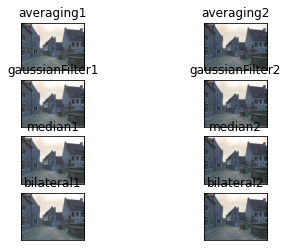

In [89]:
img = cv2.imread('inputs/leuvenA.jpeg')
gauss_noise = np.random.normal(30, 10, img.shape).astype(np.uint8)
salt_noise = np.random.randint(0, 50, img.shape).astype(np.uint8)

gauss_noise = cv2.add(img, gauss_noise)
salt_noise = cv2.add(img, salt_noise)

ave1 = cv2.blur(gauss_noise, (5, 5))
ave2 = cv2.blur(salt_noise, (5, 5))
gaussian1 = cv2.GaussianBlur(gauss_noise, (5, 5), 0)
gaussian2 = cv2.GaussianBlur(salt_noise, (5, 5), 0)
median1 = cv2.medianBlur(gauss_noise, 5)
median2 = cv2.medianBlur(salt_noise, 5)
bilateral1 = cv2.bilateralFilter(gauss_noise, 9, 75, 75)
bilateral2 = cv2.bilateralFilter(salt_noise, 9, 75, 75)

images = [ave1, ave2, gaussian1, gaussian2, median1, median2, bilateral1, bilateral2]
titles = ["averaging1", "averaging2", "gaussianFilter1", "gaussianFilter2",
               "median1", "median2", "bilateral1", "bilateral2"]

for i in range(8):
    plt.subplot(4, 2, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()

## Morphorogical transformation
### Erosion

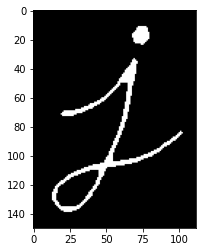

In [92]:
img = cv2.imread('inputs/j.png', 0)
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)

plt.imshow(erosion, "gray")
plt.show()

### Dilation

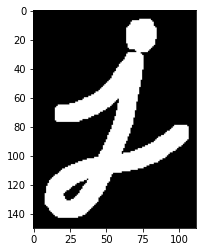

In [94]:
dilation = cv2.dilate(img, kernel, iterations=1)

plt.imshow(dilation, "gray")
plt.show()

### Opening

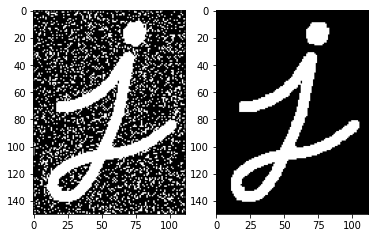

In [98]:
noise = np.random.random(img.shape)
noise = np.where(noise > 0.8, 255, 0).astype(np.uint8)
noisy = cv2.add(img, noise)

opening = cv2.morphologyEx(noisy, cv2.MORPH_OPEN, kernel)

plt.subplot(1, 2, 1)
plt.imshow(noisy, "gray")
plt.subplot(1, 2, 2)
plt.imshow(opening, "gray")
plt.show()

### Closing

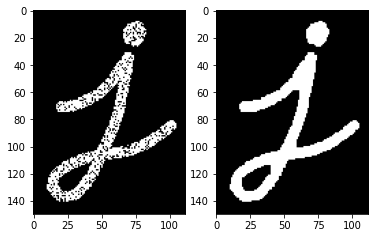

In [102]:
noise = np.random.random(img.shape)
noise = np.where(noise > 0.8, 255, 0).astype(np.uint8)
noisy = cv2.subtract(img, noise)

closing = cv2.morphologyEx(noisy, cv2.MORPH_CLOSE, kernel)

plt.subplot(1, 2, 1)
plt.imshow(noisy, "gray")
plt.subplot(1, 2, 2)
plt.imshow(closing, "gray")
plt.show()

### Morphological gradient

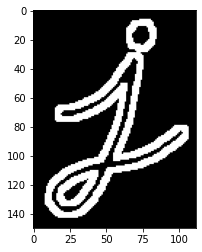

In [104]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

plt.imshow(gradient, "gray")
plt.show()

### Top hat

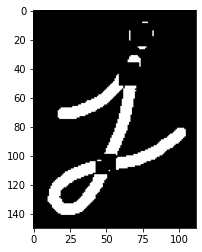

In [107]:
kernel9 = np.ones((9, 9), np.uint8)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel9)

plt.imshow(tophat, "gray")
plt.show()

### Black hat

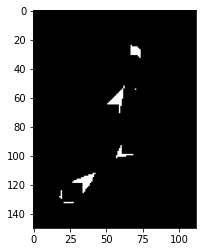

In [108]:
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel9)

plt.imshow(blackhat, "gray")
plt.show()

### Structuring element
You can get ellipse or circle shaped kernel by `cv2.getStructuringElement()`.

In [109]:
print(cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)))
print(cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
print(cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5)))

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


## Image gradient

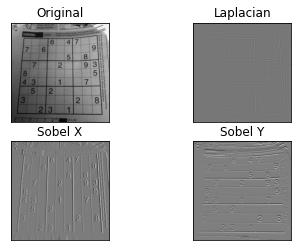

In [111]:
img = cv2.imread('inputs/sudoku.png', 0)

laplacian = cv2.Laplacian(img, cv2.CV_64F)
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

images = [img, laplacian, sobelx, sobely]
titles = ["Original", "Laplacian", "Sobel X", "Sobel Y"]

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap = "gray")
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

Sobel filter has a characteristic of smoothing and differentiation. Sobel filter of x direction is:
```
-1 0 1
-2 0 2
-1 0 1
```
Set third argument `1` to activate x direction and fourth argument `1` to y direction. Set fifth argument `-1` to use 3x3 scharr filter.

Laplacian filter calculates secondary differenciation.
```
0  1 0
1 -4 1
0  1 0
```

### Important matter
The type of pixel values should be changed to higher forms such as `cv2.CV_16S` or `cv2.CV_64F` to avoid vanishing negative gradient.

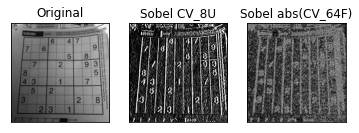

In [115]:
img = cv2.imread('inputs/sudoku.png', 0)

sobelx8u = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=5)
sobelx64f = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
abs_sobel64f = np.abs(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1,3,1)
plt.imshow(img,cmap = 'gray')
plt.title('Original'),
plt.xticks([]), plt.yticks([])

plt.subplot(1,3,2)
plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U')
plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3)
plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)')
plt.xticks([]), plt.yticks([])

plt.show()

## Canny edge detection
### Theory
1. Noises in an image should be reduced by image smoothing  because edge detection is sensitive to noises.
1. Using Sobel filter to get first differenciation in horizontal and vertical direction. Size and direction of gradient is calculated.
1. The pixel value on edge is compared to the pixel value near points in gradient direction and check whether the point on edge has maximum value. If not, its gradient is supressed. In this way, binary image including thin edge is obtained.
1. We judge whether the edge is appropiate or not by two thresholding value "minVal" and "maxVal". If the gradient value of an edge is greater than "maxVal", the edge is valid. If gradient value is less than "minVal", the edge is invalid. The gradient value between "minVal" and "maxVal" is valid if the edge is connected to another edges greater than "minVal" and invalid if not. 

### Implement

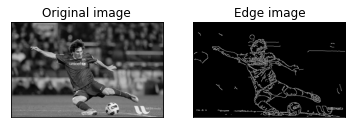

In [118]:
img = cv2.imread('inputs/messi5.jpg', 0)
edges = cv2.Canny(img, 100, 200)

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge image')
plt.xticks([]), plt.yticks([])

plt.show()

### Assignment
Create two trackbar to adjust two threshold.

In [3]:
def nothing(x):
    pass

img = cv2.imread('inputs/messi5.jpg', 0)
cv2.namedWindow('Edge')

cv2.createTrackbar('minVal', 'Edge', 0, 255, nothing)
cv2.createTrackbar('maxVal', 'Edge', 0, 255, nothing)

while(1):
    minVal = cv2.getTrackbarPos('minVal', 'Edge')
    maxVal = cv2.getTrackbarPos('maxVal', 'Edge')
    
    edge = cv2.Canny(img, minVal, maxVal)
    cv2.startWindowThread()  # This line is not needed when you execute from terminal.
    cv2.imshow('Edge', edge)
    
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break

cv2.waitKey(1)  # This line is not needed when you execute from terminal.
cv2.destroyAllWindows()
cv2.waitKey(1)  # This line is not needed when you execute from terminal.

-1

## Image Pyramids
### Theory
We sometimes need to process a image in various resolution. For example, when we want to find something in a image, it's not clear how large the object appear in a image. We prepare one image with different resolutions and all of images are searched. These set of images are called "image pyramids".
### Gaussian pyramids
An image with M x N resolution are shrinked to M/2 x N / 2 image and filtered with gaussian filter.

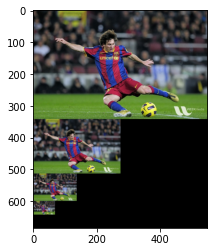

In [23]:
higher_reso = cv2.imread('inputs/messi5.jpg')
higher_reso = cv2.cvtColor(higher_reso, cv2.COLOR_BGR2RGB)
lower_reso4 = cv2.pyrDown(higher_reso)
lower_reso16 = cv2.pyrDown(lower_reso4)
lower_reso64 = cv2.pyrDown(lower_reso16)

width, height, _ = higher_reso.shape
width4 = lower_reso4.shape[0]
width16 = lower_reso16.shape[0]
width64 = lower_reso64.shape[0]

out = np.zeros((width*2, height, 3), np.uint8)
out[0:width, 0:height, :] = higher_reso
out[width:width+width4, 0:lower_reso4.shape[1], :] = lower_reso4
out[width+width4:width+width4+width16, 0:lower_reso16.shape[1], :] = lower_reso16
out[width+width4+width16:width+width4+width16+width64, 0:lower_reso64.shape[1], :] = lower_reso64

plt.imshow(out)
plt.show()

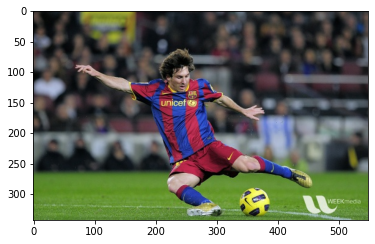

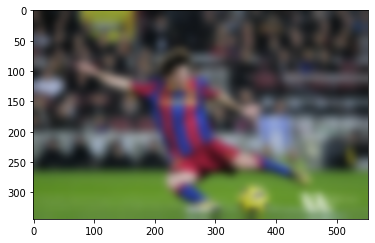

In [24]:
recovered_higher_reso =cv2.pyrUp(cv2.pyrUp(cv2.pyrUp(lower_reso64)))

plt.imshow(higher_reso)
plt.show()
plt.imshow(recovered_higher_reso)
plt.show()

### Laplacian pyramids
Laplacian pyramids are created from gaussian pyramids and the function is not offered.  
This is created by taking difference between a image on gaussian pyramids and its upsamled upper level image.

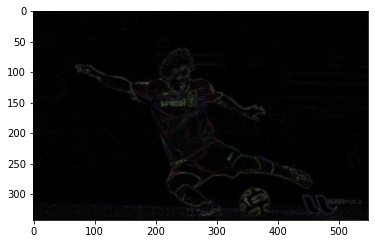

In [25]:
laplacian = cv2.absdiff(higher_reso, cv2.pyrUp(lower_reso4))

plt.imshow(laplacian)
plt.show()

### Image blending using pyramids

In [28]:
apple = cv2.imread('inputs/apple.jpeg')
orange = cv2.imread('inputs/orange.jpeg')

# Gaussian pyramids
gp = apple.copy()
gp_apple = [gp]
for i in range(6):
    gp = cv2.pyrDown(gp)
    gp_apple.append(gp)

gp = orange.copy()
gp_orange = [gp]
for i in range(6):
    gp = cv2.pyrDown(gp)
    gp_orange.append(gp)


# Laplacian pyramids
lp_apple = [gp_apple[5]]
for i in range(5, 0, -1):
    lp = cv2.subtract(gp_apple[i-1], cv2.pyrUp(gp_apple[i]))
    lp_apple.append(lp)

lp_orange = [gp_orange[5]]
for i in range(5, 0, -1):
    lp = cv2.subtract(gp_orange[i-1], cv2.pyrUp(gp_orange[i]))
    lp_orange.append(lp)


lp_half_and_half = []
for lp_a, lp_o in zip(lp_apple, lp_orange):
    rows, cols, channels = lp_a.shape
    lp_h = np.hstack((lp_a[:, 0:cols//2], lp_o[:, cols//2:]))
    lp_half_and_half.append(lp_h)

blend = lp_half_and_half[0]
for i in range(1, 6):
    blend = cv2.pyrUp(blend)
    blend = cv2.add(blend, lp_half_and_half[i])

direct = np.hstack((apple[:, :cols//2], orange[:,cols//2:]))

cv2.imwrite('outputs/pyramid_blending.jpg', blend)
cv2.imwrite('outputs/direct_blending.jpg', direct)

True